<center><h1 style="color: purple"> Airbnb Mini Practice Project </h1>


### Step 1: Import Libraries


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Import csv

In [44]:
airbnb = pd.read_csv('airbnb_2.csv')
airbnb.head(3)
#airbnb.columns

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Step 3: Exploring your data with Pandas

The questions will have you focus on using the following Pandas Skills:

<li> Subsetting a Pandas dataframe using [] and boolean operators </li>
<li> Summing up Records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 

<b> i)  Count how many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and identify which Neighbourhood Groups has the largest number of Airbnb Listings </b>
<p>

In [4]:
airbnb['neighbourhood_group'].value_counts()

# largest listing = Manhattan at 21661

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

<b> ii) Calculate the % listings that each Neighbourhood Group contains. </b>

In [5]:
airbnb['neighbourhood_group'].value_counts(normalize=True)

neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: proportion, dtype: float64

<b> iii) Create a new calculated field called Revenue and place this into the Airbnb Dataframe. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

In [66]:
airbnb['Revenue']=airbnb['price']*airbnb['number_of_reviews']
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365,1341
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355,10125
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0


<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues. In order to best
calculate this, you'd want to consider how you can use the .groupby() syntax to assist you! </b>

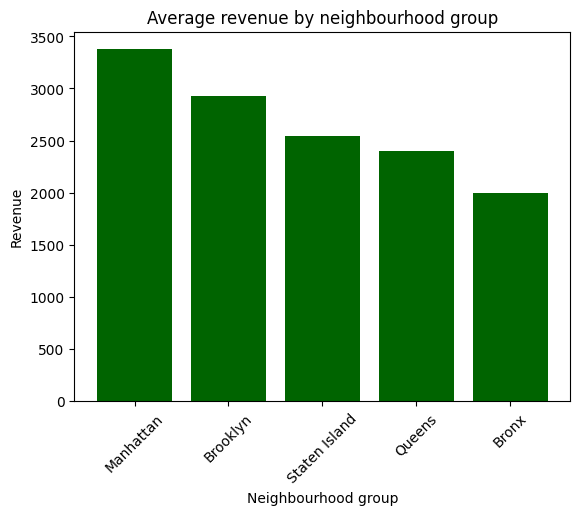

In [205]:
avg_rev=airbnb.groupby('neighbourhood_group')['Revenue'].mean()\
    .reset_index()\
    .sort_values(by='Revenue', ascending=False)
avg_rev.head()

fig, ax=plt.subplots()
ax.bar(avg_rev['neighbourhood_group'], avg_rev['Revenue'], color='DarkGreen')
ax.set_xlabel("Neighbourhood group")
ax.set_ylabel("Revenue")
ax.set_title('Average revenue by neighbourhood group')
plt.xticks(rotation=45)
plt.show()

<h3> <span style="color:purple">Challenge Questions</span> </h3>

<b> V) Filter the Airbnb Dataframe to include only the Neighbourhood Groups `Manhattan`, `Brooklyn` and `Queens`. 
    
Upon completion of this, identify the `top 3 Revenue Generating Neighborhoods` within each of the `three Neighbourhood_Groups`. This should give us 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups </b>

This is a tricky question that will *test* your group-by skills.

In [235]:
# filter dataframe for Manhattan, Brooklyn and Queens
filtered_airbnb = (
    airbnb[airbnb['neighbourhood_group'].isin(['Manhattan', 'Brooklyn', 'Queens'])]
)
#print(filtered_airbnb.head())

# Step Two - Group the Data by Neighbourhood_Group and Neighbourhood
grouped_airbnb = (
    filtered_airbnb.groupby(['neighbourhood_group', 'neighbourhood'])['Revenue']
    .sum().reset_index()
  .sort_values(by=['neighbourhood_group', 'Revenue'], ascending=[True, False])
)
#print(grouped_airbnb)

# identify the top 3 Revenue Generating Neighborhoods in each of the 3 Neighbourhood_Groups. 
# 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Grou
top_3_revenue = grouped_airbnb.groupby('neighbourhood_group').head(3)

top_3_revenue

,neighbourhood_group,neighbourhood,Revenue
45,Brooklyn,Williamsburg,12389011
2,Brooklyn,Bedford-Stuyvesant,12352457
10,Brooklyn,Bushwick,4762224
57,Manhattan,Harlem,8598692
58,Manhattan,Hell's Kitchen,8238991
52,Manhattan,East Village,7574535
80,Queens,Astoria,1880840
112,Queens,Long Island City,1374945
97,Queens,Flushing,1140450


<b> VI) Building on the previous question where you identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, please filter the Airbnb Dataframe to include only these neighbourhoods. 
    
Upon completion of this, identify the  <b>`top average revenue generating room type`</b> for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>

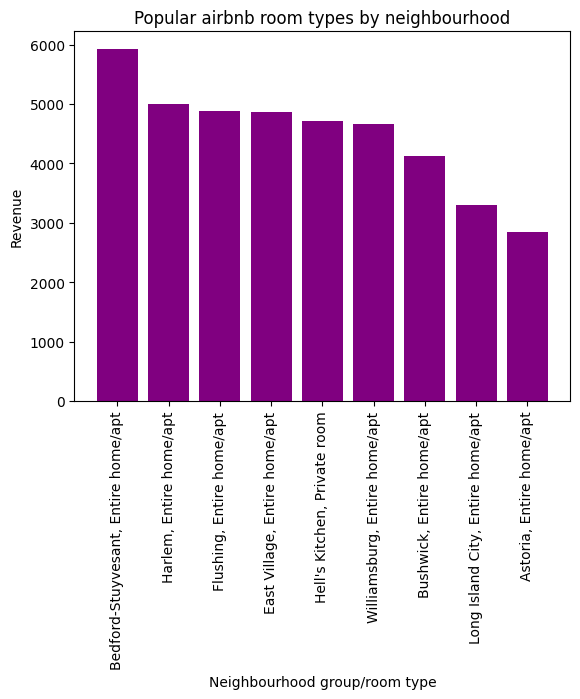

In [271]:
# Step 1 - how can you make a list of the 9 neighboorhoods (top_3_revenue df)
# Assuming 'top_3' contains the top 9 neighbourhoods from the previous question
top_list = top_3_revenue['neighbourhood'].tolist()
#print(top_list)

# Step 2 - filter the airbnb data to this list 
new_airbnb = airbnb[airbnb['neighbourhood'].isin(top_list)]
#print(new_airbnb.head())
#new_airbnb.columns

# Step 3 - Apply your standard aggregation syntax you've previously 
# learned when using the .groupby() function
grouped_new_airbnb = (
    new_airbnb.groupby(['neighbourhood', 'room_type'])['Revenue'].mean()
    .reset_index()
    .sort_values(by=['neighbourhood', 'Revenue'],ascending=[True, False])   
)
#grouped_new_airbnb.head()

# Step 4 - Just as you previously made use of .head() and .reset_index() to get the top neighbourhoods
# how might you use a similar approach to get the top room_type for each neighbourhood?
top_rooms = (
    grouped_new_airbnb.groupby('neighbourhood')
    .head(1).sort_values('Revenue', ascending=False)
)
#top_rooms

# Step 5 - Create a bar plot
fig, ax=plt.subplots()
ax.bar(top_rooms['neighbourhood'] + ', ' + top_rooms['room_type'], top_rooms['Revenue'], color='Purple')
ax.set_xlabel("Neighbourhood group/room type")
ax.set_ylabel("Revenue")
ax.set_title('Popular airbnb room types by neighbourhood')
plt.xticks(rotation=90)
plt.show()

#plt.bar(x=top_rooms['neighbourhood'], height=top_rooms['Revenue'])

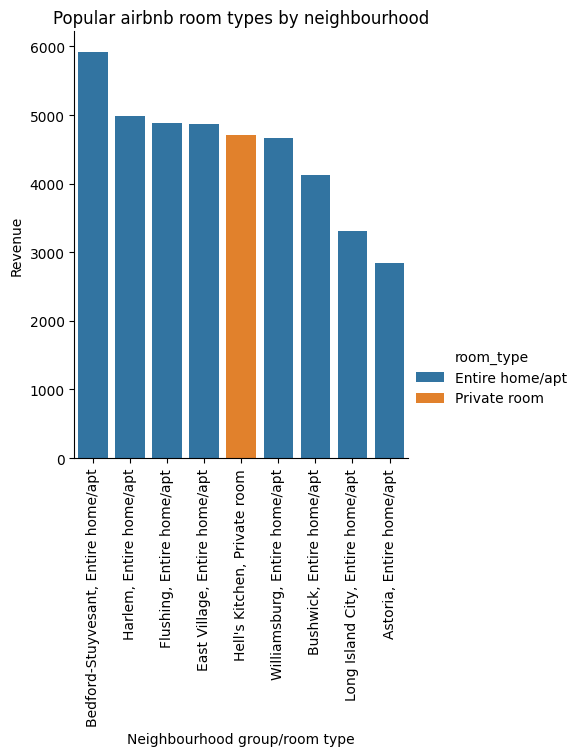

In [293]:
#%pip install seaborn
#import seaborn as sns
top_list = top_3_revenue['neighbourhood'].tolist()
#print(top_list)

# Step 2 - filter the airbnb data to this list 
new_airbnb = airbnb[airbnb['neighbourhood'].isin(top_list)]
#print(new_airbnb.head())
#new_airbnb.columns

# Step 3 - Apply your standard aggregation syntax you've previously 
# learned when using the .groupby() function
grouped_new_airbnb = (
    new_airbnb.groupby(['neighbourhood', 'room_type'])['Revenue'].mean()
    .reset_index()
    .sort_values(by=['neighbourhood', 'Revenue'],ascending=[True, False])   
)

# Step 4 - Just as you previously made use of .head() and .reset_index() to get the top neighbourhoods
# how might you use a similar approach to get the top room_type for each neighbourhood?
top_rooms = (
    grouped_new_airbnb.groupby('neighbourhood')
    .head(1).sort_values('Revenue', ascending=False)
)


# Step 5 - Create a bar plot
sns.catplot(x=top_rooms['neighbourhood'] + ', ' + top_rooms['room_type'], y='Revenue', 
            data=top_rooms, kind='bar', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood group/room type")
plt.ylabel("Revenue")
plt.title('Popular airbnb room types by neighbourhood')
plt.show()
